In [96]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
from PIL import Image

In [60]:
import warnings
warnings.filterwarnings('ignore')

# Валидация с 9 метрками с использованием Байесовского оптимизатора

In [104]:
df_search_parameters_Fibroblasts_Induced_Neurons = pd.read_csv('df_search_parameters_Fibroblasts_Induced_Neurons.csv', index_col =0)

In [105]:
df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling = df_search_parameters_Fibroblasts_Induced_Neurons[(df_search_parameters_Fibroblasts_Induced_Neurons['id_folder'] > 220) & (df_search_parameters_Fibroblasts_Induced_Neurons['id_folder'] < 301)]
df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling.head()

,Unnamed: 0.1,id_folder,dict_additive_factor,dict_multiplication_factor,average_statistic,average_p_value,mean_synergy,mean_not_synergy,dif_mean,description
75,221,221,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 4.11004654338743, 'betweenness': 4.7...",0.050232,2.880055e-24,0.742953,0.753377,0.010423,"bayes, 9 metrics"
76,222,222,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 4.755743221304143, 'betweenness': 5....",0.049155,1.514513e-19,0.734983,0.749100,0.014117,"bayes, 9 metrics"
77,223,223,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 9.051459971534626, 'betweenness': 2....",0.054812,4.512734e-26,0.730094,0.743735,0.013641,"bayes, 9 metrics"
78,224,224,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 7.226894025554261, 'betweenness': 1....",0.055371,6.849017e-27,0.731611,0.744168,0.012557,"bayes, 9 metrics"
79,225,225,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 8.103513956063397, 'betweenness': 7....",0.051869,2.497115e-23,0.726660,0.740831,0.014171,"bayes, 9 metrics"


In [106]:
list_metric = ['logFC', 'betweenness', 'pagerank', 'closeness', 'katz', 'hits_authority', 'hits_hub', 'eigenvector',
                   'eigentrust']
coeff_dict = {}
for metric in list_metric:
    coeff_dict['coeff_' + metric] = []
for i in range(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling.shape[0]):
    d = eval(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling.iloc[i,2])
    for metric in list_metric:
        coeff_dict['coeff_' + metric].append(d[metric])
for metric in list_metric: 
    df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['coeff_' + metric] = coeff_dict['coeff_' + metric]

In [107]:
df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling.head()

,Unnamed: 0.1,id_folder,dict_additive_factor,dict_multiplication_factor,average_statistic,average_p_value,mean_synergy,mean_not_synergy,dif_mean,description,coeff_logFC,coeff_betweenness,coeff_pagerank,coeff_closeness,coeff_katz,coeff_hits_authority,coeff_hits_hub,coeff_eigenvector,coeff_eigentrust
75,221,221,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 4.11004654338743, 'betweenness': 4.7...",0.050232,2.880055e-24,0.742953,0.753377,0.010423,"bayes, 9 metrics",1,1,1,1,1,1,1,1,1
76,222,222,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 4.755743221304143, 'betweenness': 5....",0.049155,1.514513e-19,0.734983,0.749100,0.014117,"bayes, 9 metrics",1,1,1,1,1,1,1,1,1
77,223,223,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 9.051459971534626, 'betweenness': 2....",0.054812,4.512734e-26,0.730094,0.743735,0.013641,"bayes, 9 metrics",1,1,1,1,1,1,1,1,1
78,224,224,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 7.226894025554261, 'betweenness': 1....",0.055371,6.849017e-27,0.731611,0.744168,0.012557,"bayes, 9 metrics",1,1,1,1,1,1,1,1,1
79,225,225,"{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...","{'logFC': 8.103513956063397, 'betweenness': 7....",0.051869,2.497115e-23,0.726660,0.740831,0.014171,"bayes, 9 metrics",1,1,1,1,1,1,1,1,1


Посмотрим на распределения p_value и разницы средних

/home/dinara/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


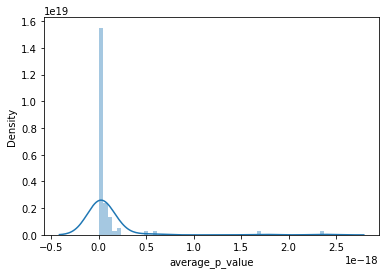

In [7]:
snsplot = sns.distplot(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['average_p_value'])

/home/dinara/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


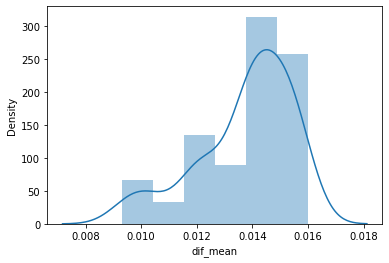

In [8]:
snsplot = sns.distplot(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['dif_mean'])

Нарисовала проекции значений p_value и разницы средних на коэффициенты(они не несут особого смысла, так как все коэффициенты одновременно меняются)

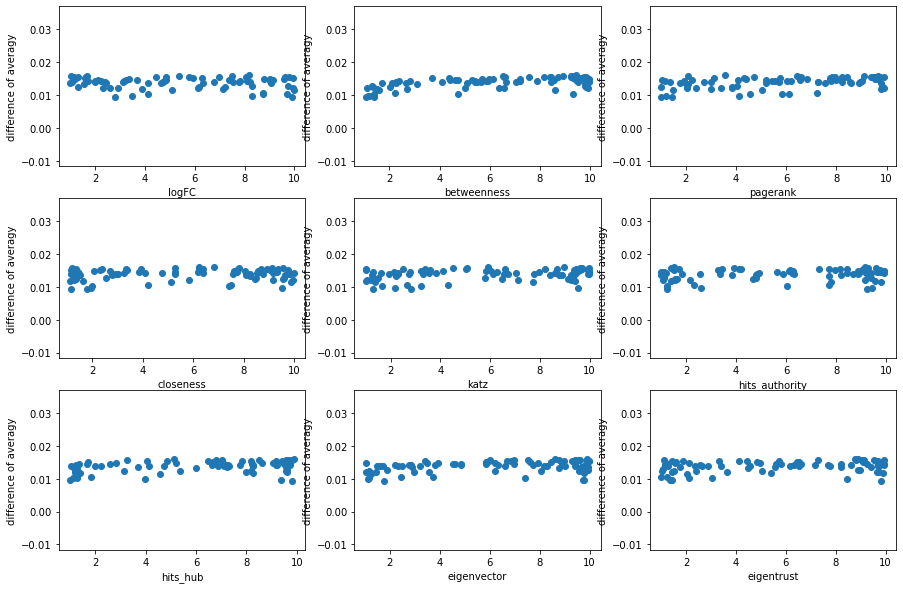

In [9]:
plt.figure(figsize=(15,10))
for (i, metric) in zip(range(1,10), list_metric):
    plt.subplot(3,3,i)
    plt.xlabel(metric)
    plt.ylabel('difference of averagу')
    plt.scatter(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['coeff_' + metric], df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['dif_mean'])

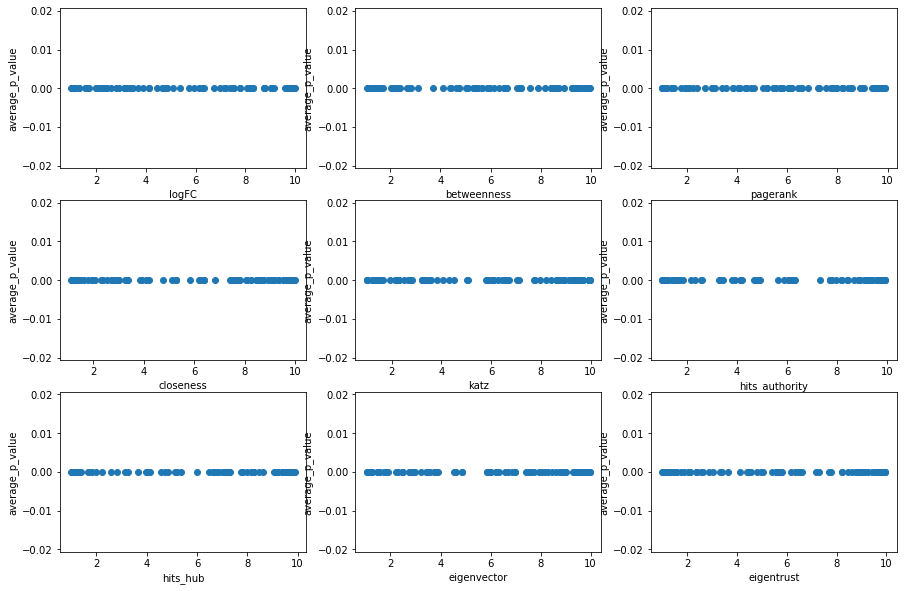

In [11]:
plt.figure(figsize=(15,10))
for (i, metric) in zip(range(1,10), list_metric):
    plt.subplot(3,3,i)
    plt.xlabel(metric)
    plt.ylabel('average_p_value')
    plt.scatter(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['coeff_' + metric], df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['average_p_value'])

In [12]:
print('максимальное значение average pvalue: {}'.format(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['average_p_value'].max()))

максимальное значение average pvalue: 2.3772731341677088e-18


Посмотрим на значения коэффициентов и построим распределение, соответствующих максимуму.

In [13]:
with open("Validation_results_Fibroblasts_Induced_Neurons/Validation_results_Fibroblasts_Induced_Neurons_9_metrics/_max_bayes_Fibroblasts_Induced_Neurons.json", "r") as read_file:
    max_res = json.load(read_file)

In [73]:
max_res

{'target': 0.01598290454469009,
 'params': {'coeff_betweenness': 9.460967341000304,
  'coeff_closeness': 6.238127619523721,
  'coeff_eigentrust': 8.909487859706598,
  'coeff_eigenvector': 8.602610008529997,
  'coeff_hits_authority': 9.148530868377843,
  'coeff_hits_hub': 5.138922392351263,
  'coeff_katz': 5.917121344183359,
  'coeff_logFC': 8.187432320368355,
  'coeff_pagerank': 3.571469665607328}}

In [16]:
id_max = int(df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling[df_search_parameters_Fibroblasts_Induced_Neurons_9_metrics_new_scaling['dif_mean'] == max_res['target']]['id_folder'])
print(id_max)

246


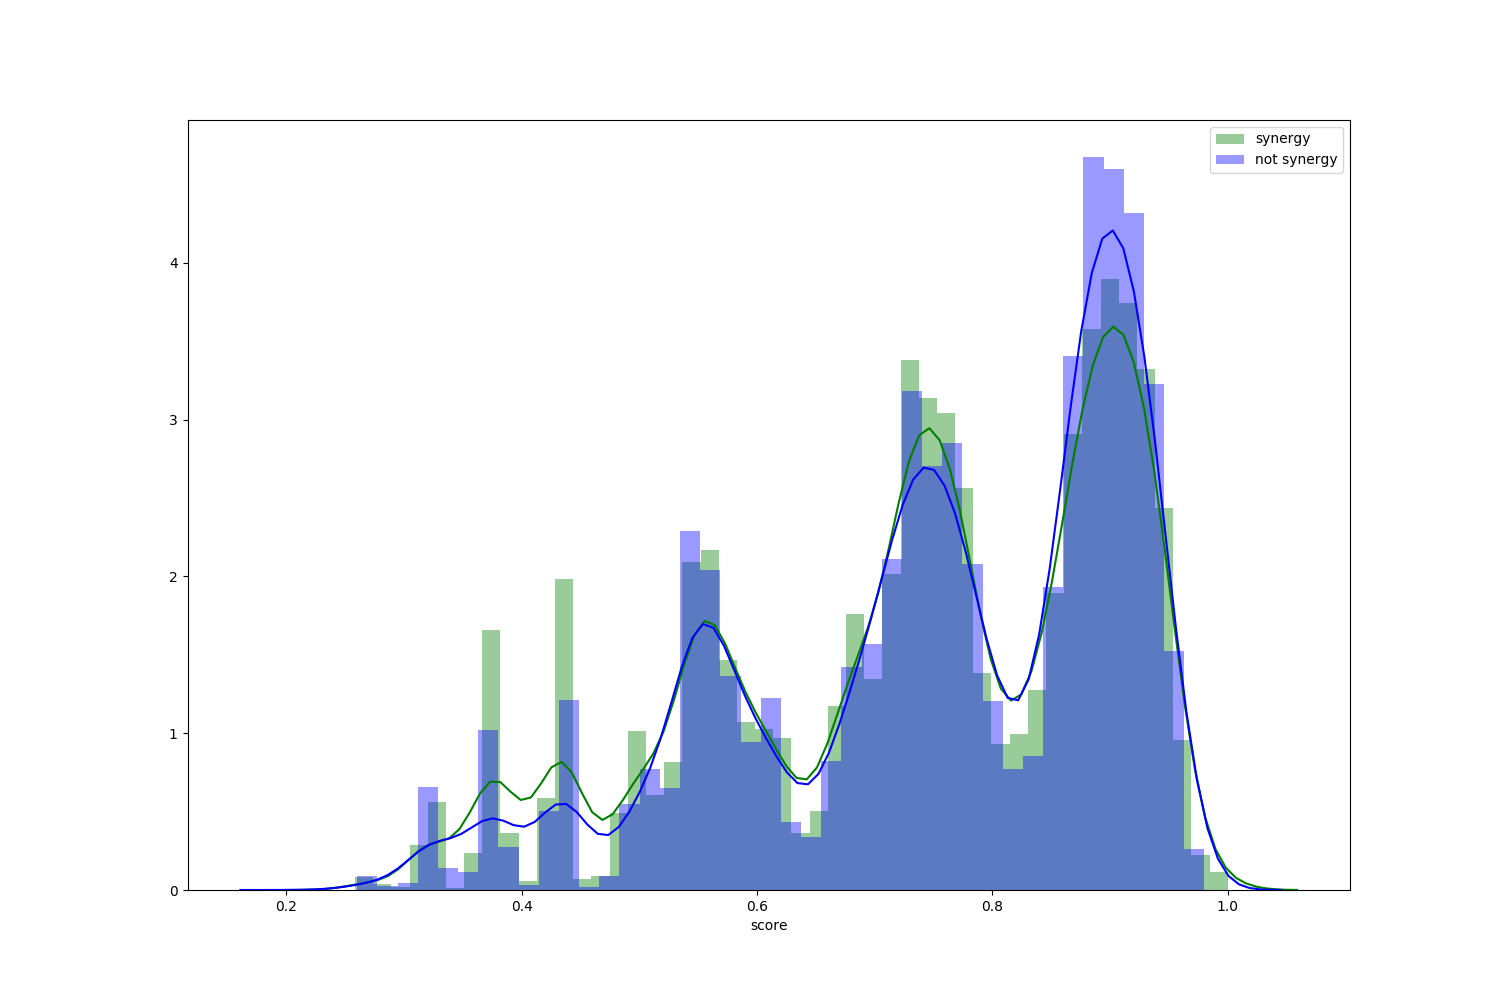

In [28]:
img = Image('Validation_results_Fibroblasts_Induced_Neurons/Validation_results_Fibroblasts_Induced_Neurons_9_metrics/fig_Fibroblasts_Induced_Neurons_' + str(id_max) + '.png')
display(img)

Посмотрим какие распределения получались.

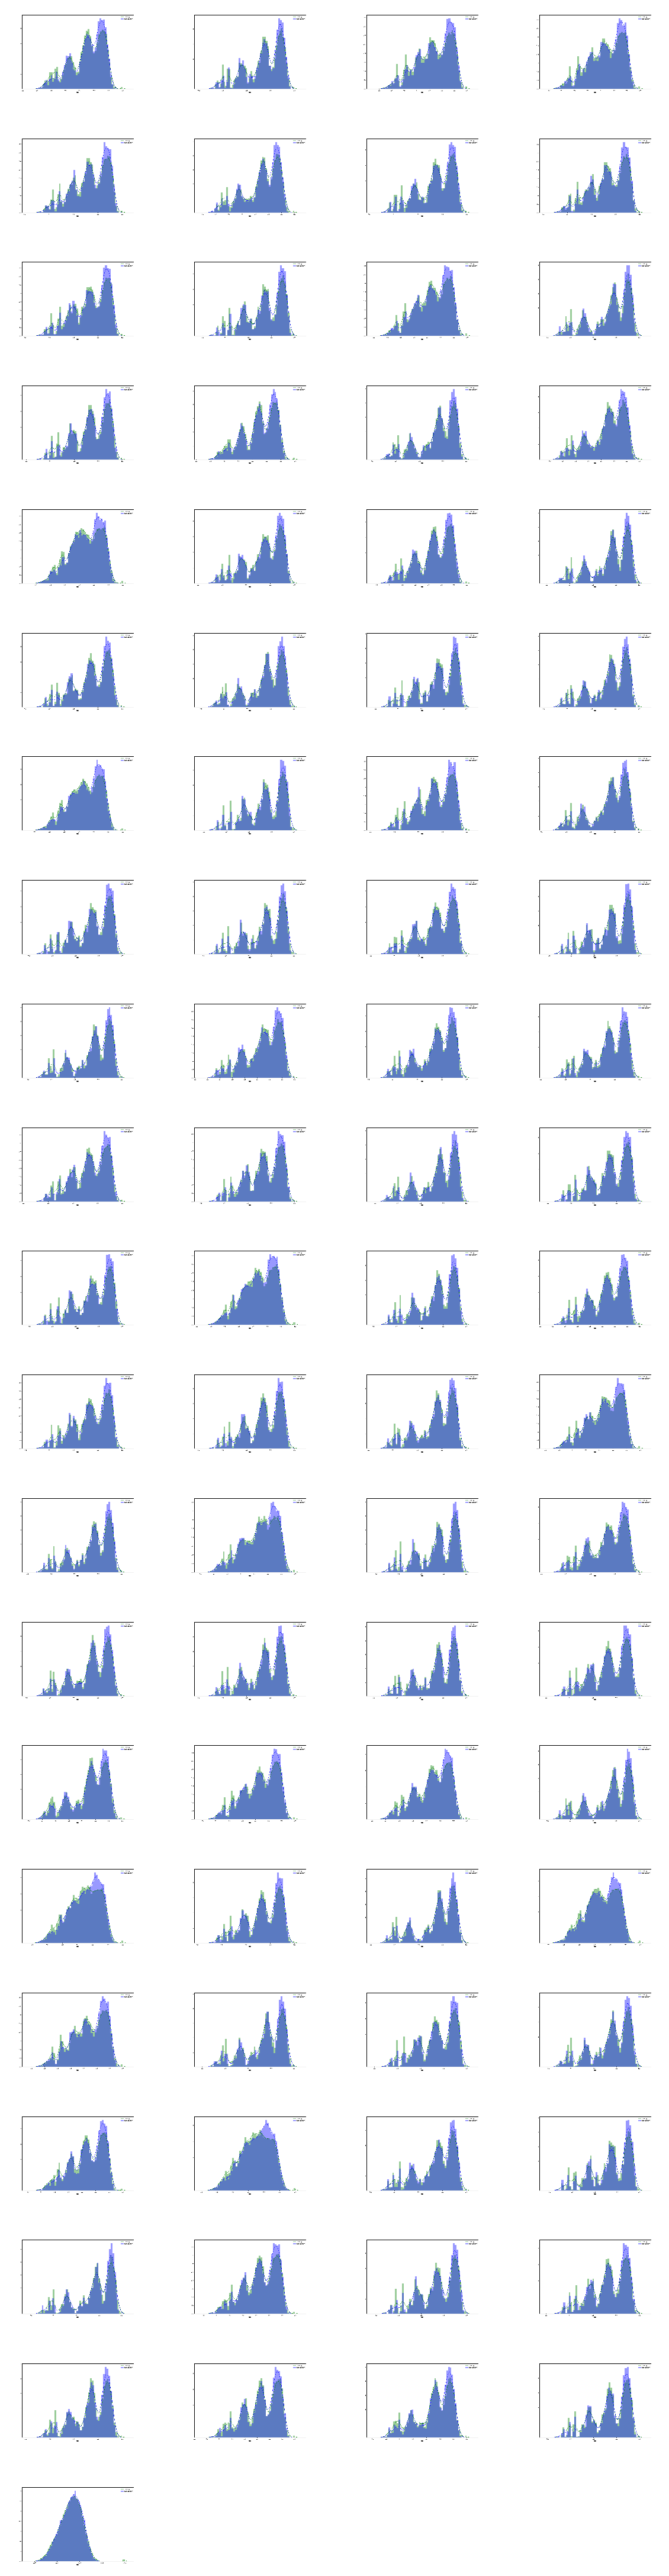

In [72]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

fig = figure( figsize=(20, 80))
col = 4
number_of_images = 81
row = number_of_images/col
if (number_of_images%col != 0):
    row += 1
for i in range(number_of_images):
    a=fig.add_subplot(row,col,i+1)
    image = imread('Validation_results_Fibroblasts_Induced_Neurons/Validation_results_Fibroblasts_Induced_Neurons_9_metrics/fig_Fibroblasts_Induced_Neurons_' + str(i + 221) + '.png')
    imshow(image)
    axis('off')


# Валидация с 7 метриками (когда меняется только один из коэффициентов, а остальные 6 постоянны)

In [52]:
df_search_parameters_Fibroblasts_Induced_Neurons = pd.read_csv('df_search_parameters_Fibroblasts_Induced_Neurons.csv', index_col =0)
df_search_parameters_Fibroblasts_Induced_Neurons.head()

,Unnamed: 0.1,id_folder,dict_additive_factor,dict_multiplication_factor,average_statistic,average_p_value,mean_synergy,mean_not_synergy,dif_mean,description
0,0,2,"{'logFC': 0, 'betweenness': 0, 'pagerank': 0, ...","{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...",0.016785,0.037042,0.966520,0.966655,0.000135,NaN
1,1,1,"{'logFC': 0, 'betweenness': 0, 'pagerank': 0, ...","{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...",0.016785,0.037042,0.966520,0.966655,0.000135,NaN
2,2,2,"{'logFC': 0, 'betweenness': 0, 'pagerank': 0, ...","{'logFC': 1, 'betweenness': 1, 'pagerank': 1, ...",0.016785,0.037042,0.966520,0.966655,0.000135,NaN
3,3,3,"{'logFC': 0, 'betweenness': 0, 'pagerank': 0, ...","{'logFC': 0.34556072704304774, 'betweenness': ...",0.017946,0.047648,0.978601,0.978704,0.000104,NaN
4,4,4,"{'logFC': 0, 'betweenness': 0, 'pagerank': 0, ...","{'logFC': 0.41730480236712697, 'betweenness': ...",0.017739,0.044528,0.976716,0.976826,0.000110,NaN


In [10]:
df_search_parameters_Fibroblasts_Induced_Neurons['description'].value_counts()

bayes, 9 metrics                             80
6_constant_factors_1_variable_katz           50
6_constant_factors_1_variable_logFC          50
6_constant_factors_1_variable_eigenvector    50
6_constant_factors_1_variable_eigentrust     50
6_constant_factors_1_variable_betweenness    50
6_constant_factors_1_variable_closeness      50
6_constant_factors_1_variable_pagerank       50
Name: description, dtype: int64

In [81]:
def view_results(df, description, dif_limit, p_limit):
    df = df[df['description'] == description]
    list_metric = ['logFC', 'betweenness', 'pagerank', 'closeness', 'katz', 'eigenvector', 'eigentrust']
    coeff_dict = {}
    for metric in list_metric:
        coeff_dict['coeff_' + metric] = []
    for i in range(df.shape[0]):
        d = eval(df.iloc[i,3])
        for metric in list_metric:
            coeff_dict['coeff_' + metric].append(d[metric])
    for metric in list_metric: 
        df['coeff_' + metric] = coeff_dict['coeff_' + metric]
    plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    snsplot1 = sns.distplot(df['average_p_value'])
    plt.subplot(1,2,2)
    snsplot2 = sns.distplot(df['dif_mean'])
        
    plt.figure(figsize=(20,10))
    for (i, metric) in zip(range(1,10), list_metric):
        plt.subplot(3,3,i)
        plt.xlabel(metric)
        plt.ylabel('average_p_value')
        plt.scatter(df['coeff_' + metric], df['average_p_value'])
        plt.axis([0, 11, - p_limit, p_limit])
        
    plt.figure(figsize=(20,10))
    for (i, metric) in zip(range(1,10), list_metric):
        plt.subplot(3,3,i)
        plt.xlabel(metric)
        plt.ylabel('difference of averagу')
        plt.scatter(df['coeff_' + metric], df['dif_mean'])
        plt.axis([0, 11, -dif_limit, dif_limit])

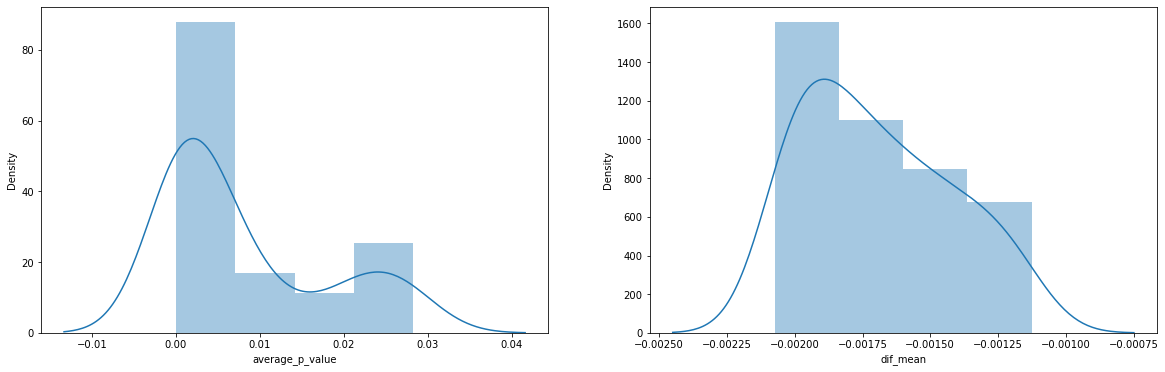

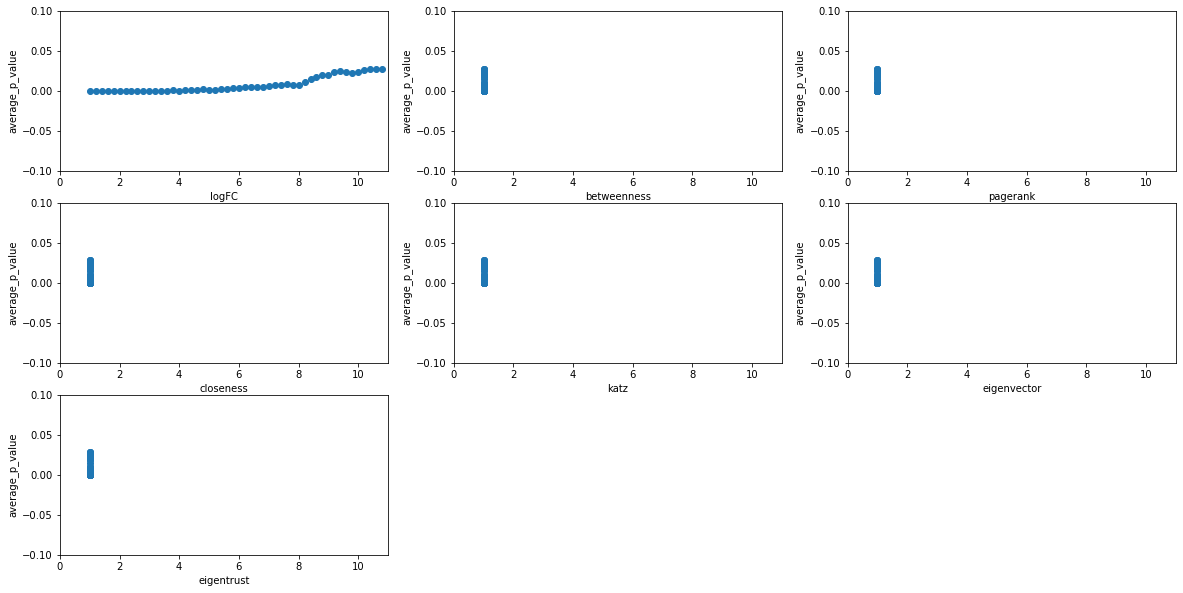

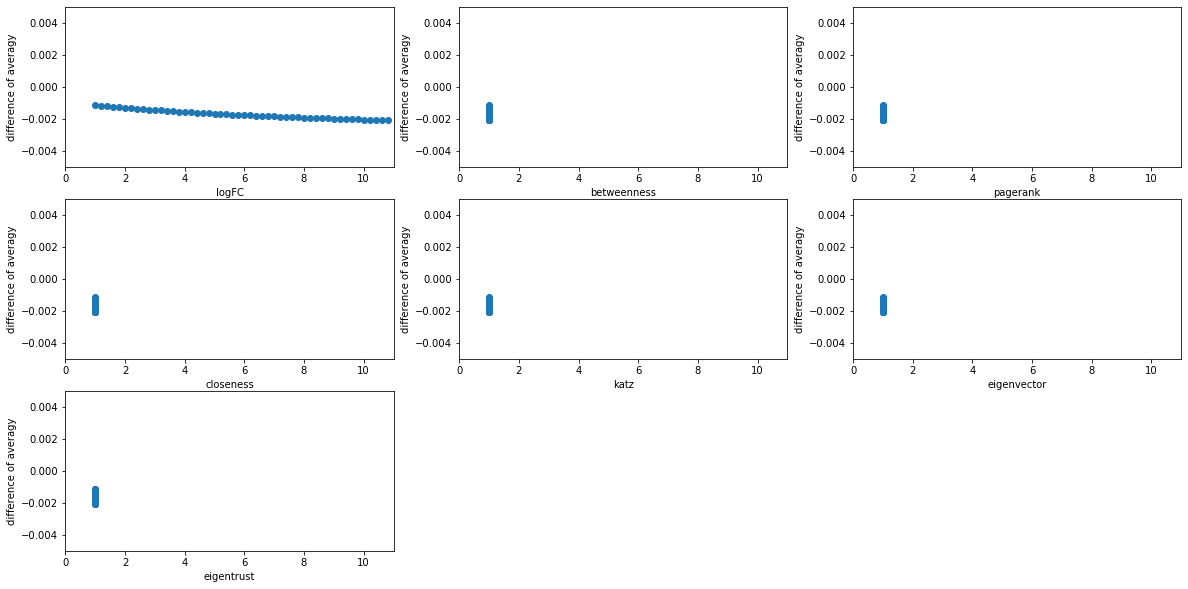

In [82]:
view_results(df_search_parameters_Fibroblasts_Induced_Neurons, '6_constant_factors_1_variable_logFC', 0.005, 0.1)

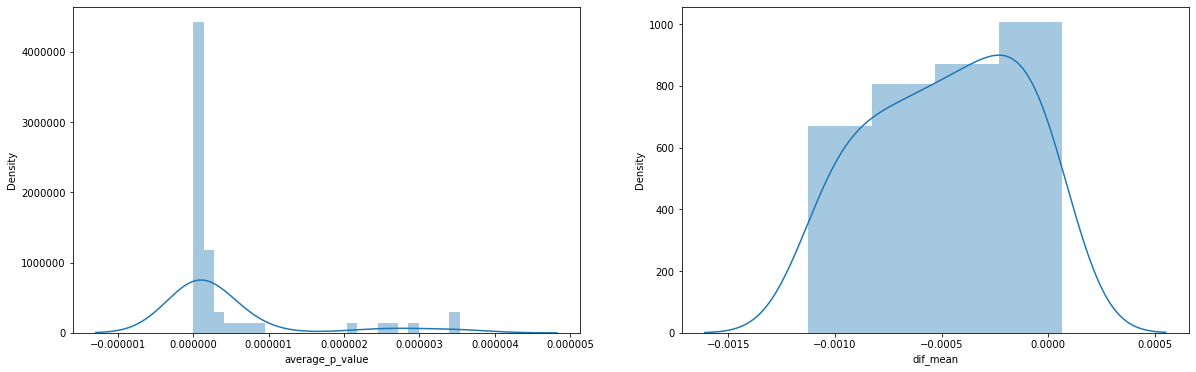

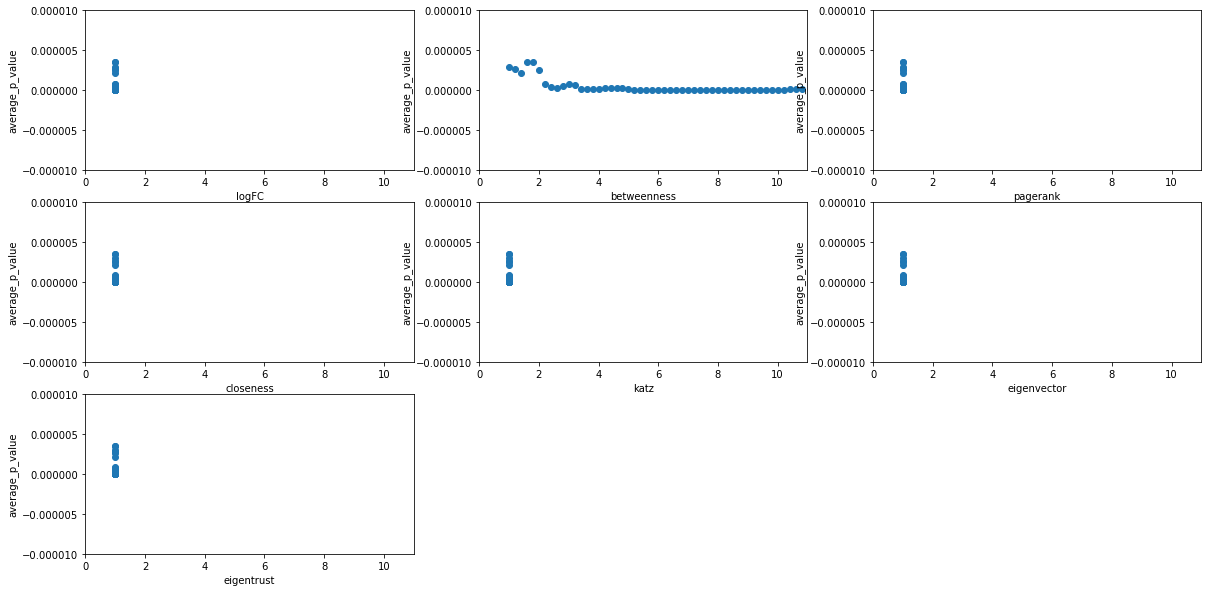

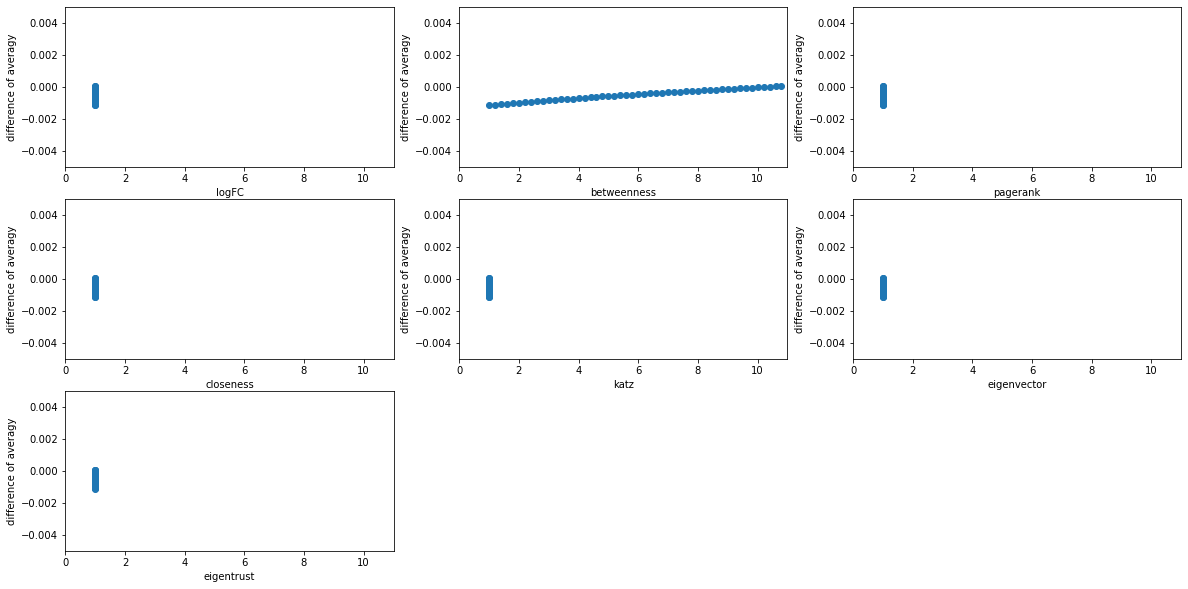

In [83]:
view_results(df_search_parameters_Fibroblasts_Induced_Neurons, '6_constant_factors_1_variable_betweenness', 0.005, 0.00001)

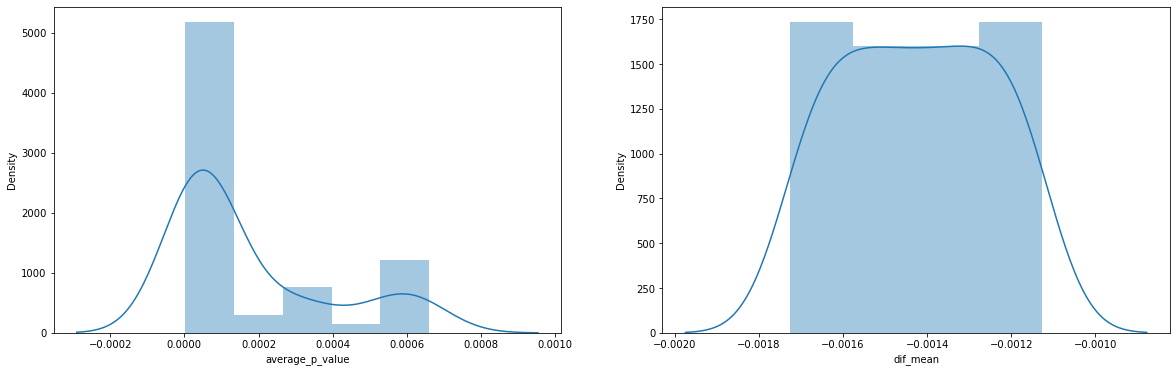

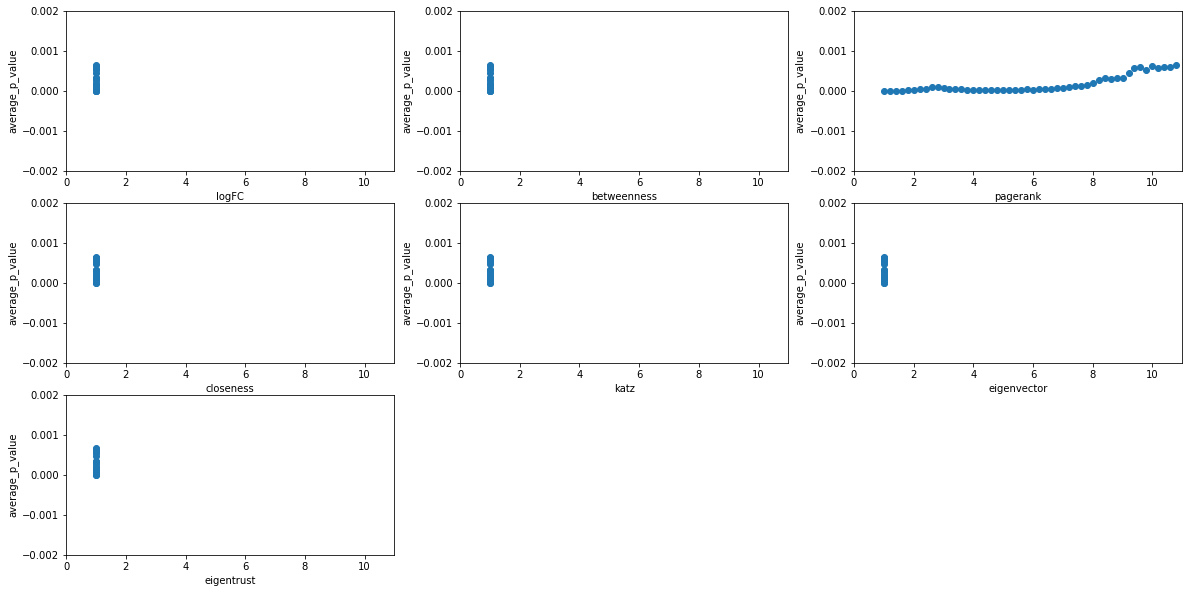

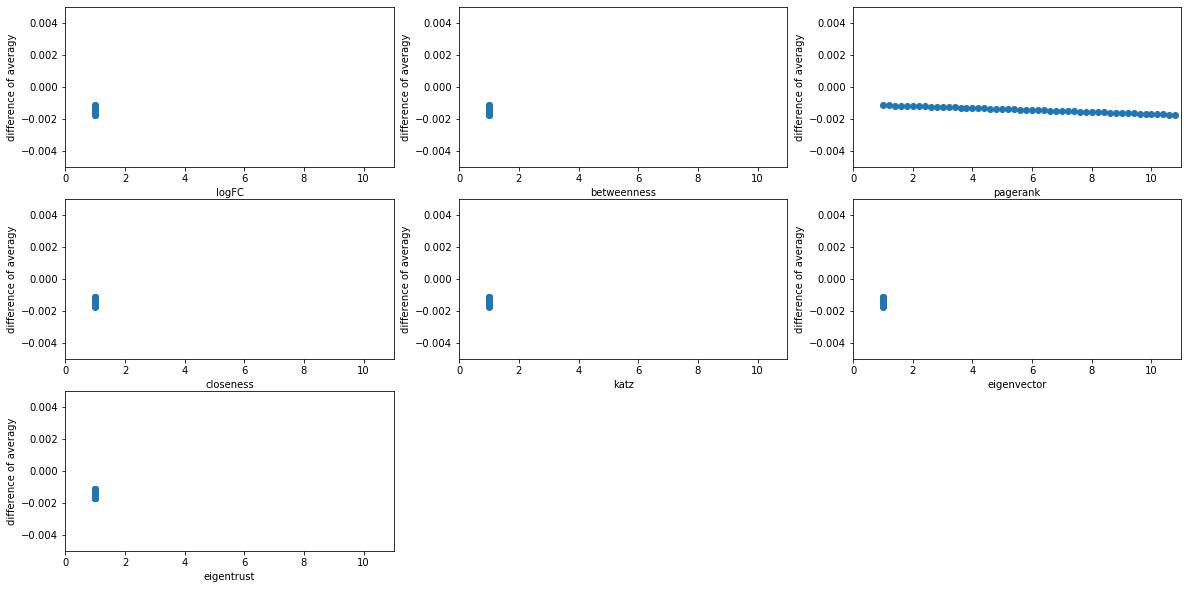

In [84]:
view_results(df_search_parameters_Fibroblasts_Induced_Neurons, '6_constant_factors_1_variable_pagerank', 0.005, 0.002)

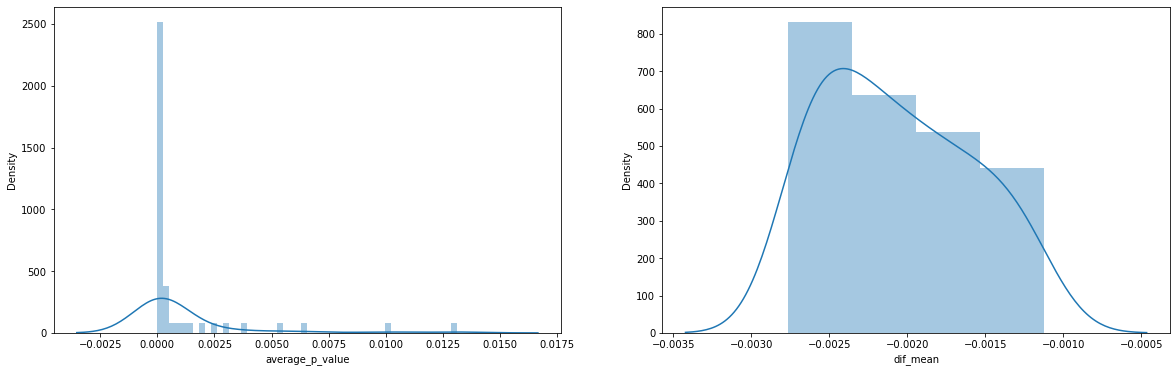

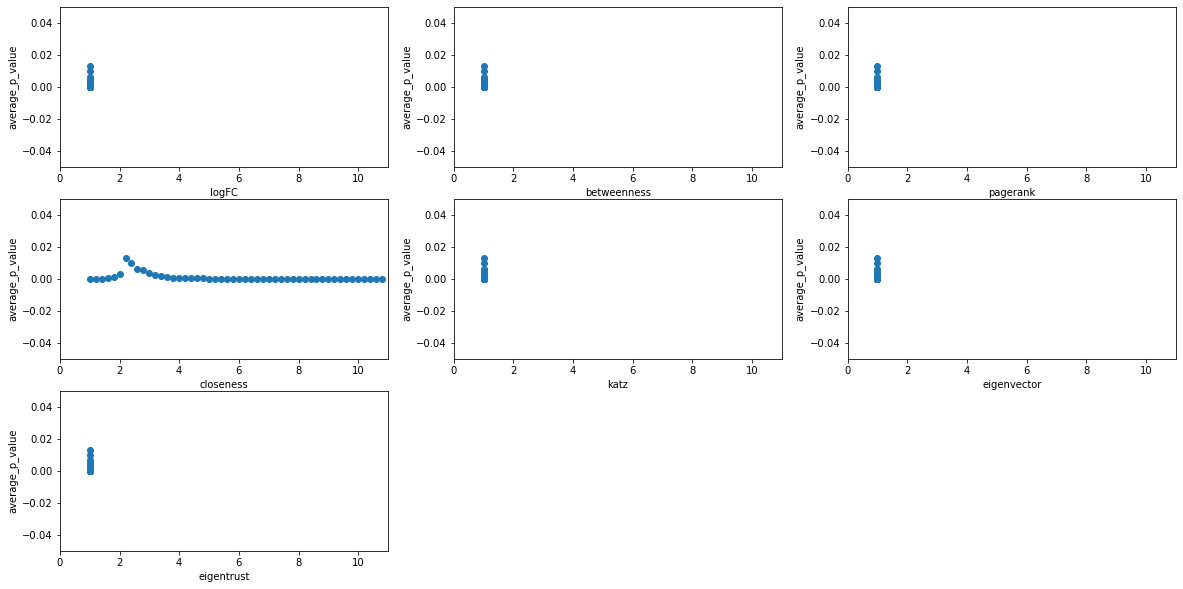

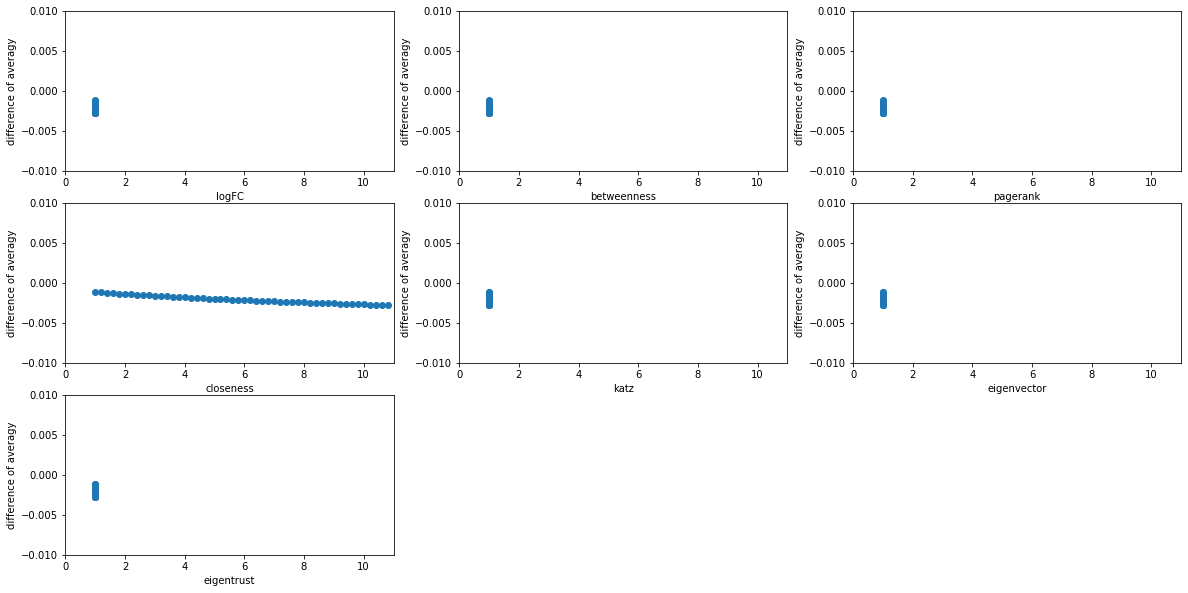

In [87]:
view_results(df_search_parameters_Fibroblasts_Induced_Neurons, '6_constant_factors_1_variable_closeness', 0.01, 0.05)

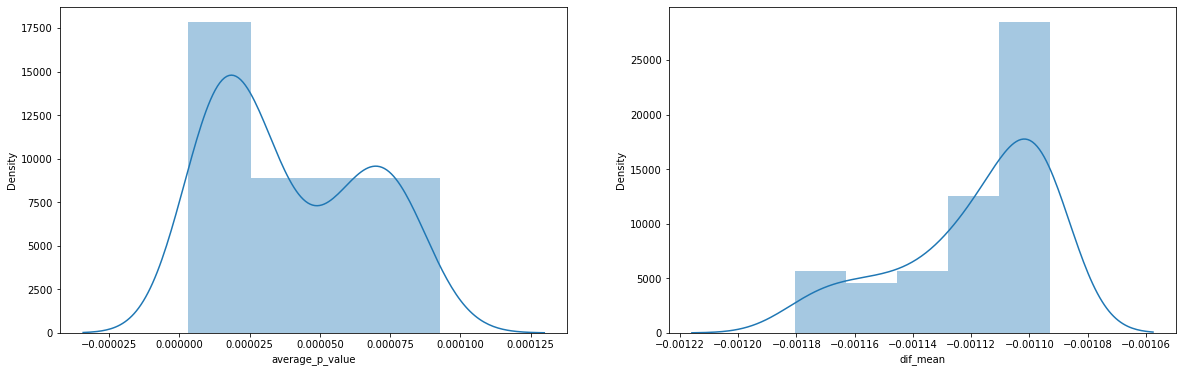

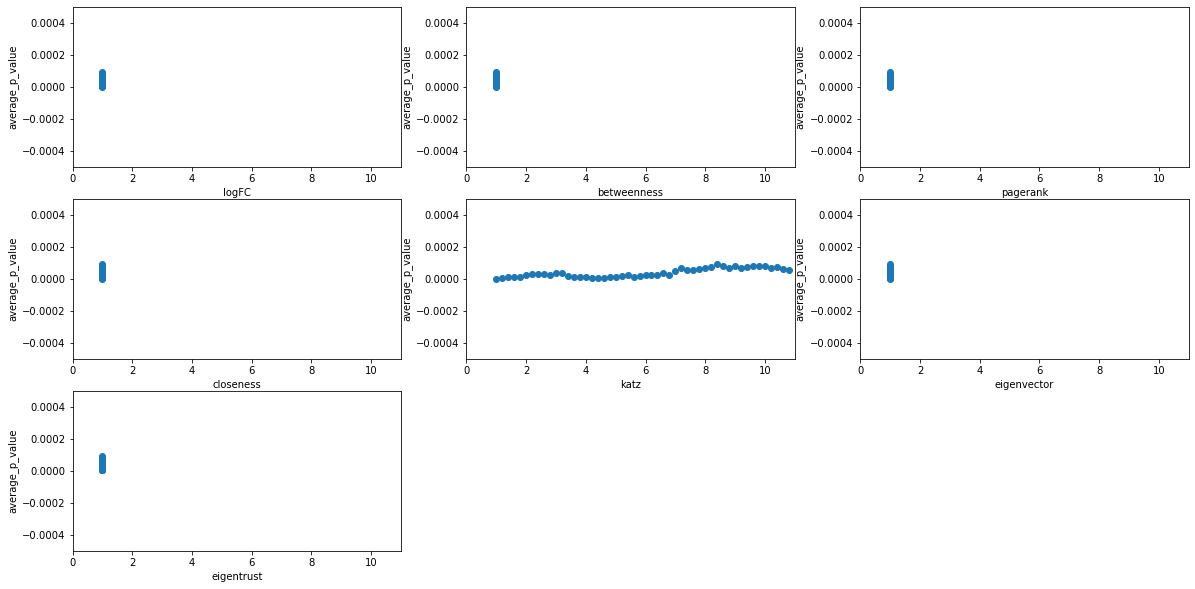

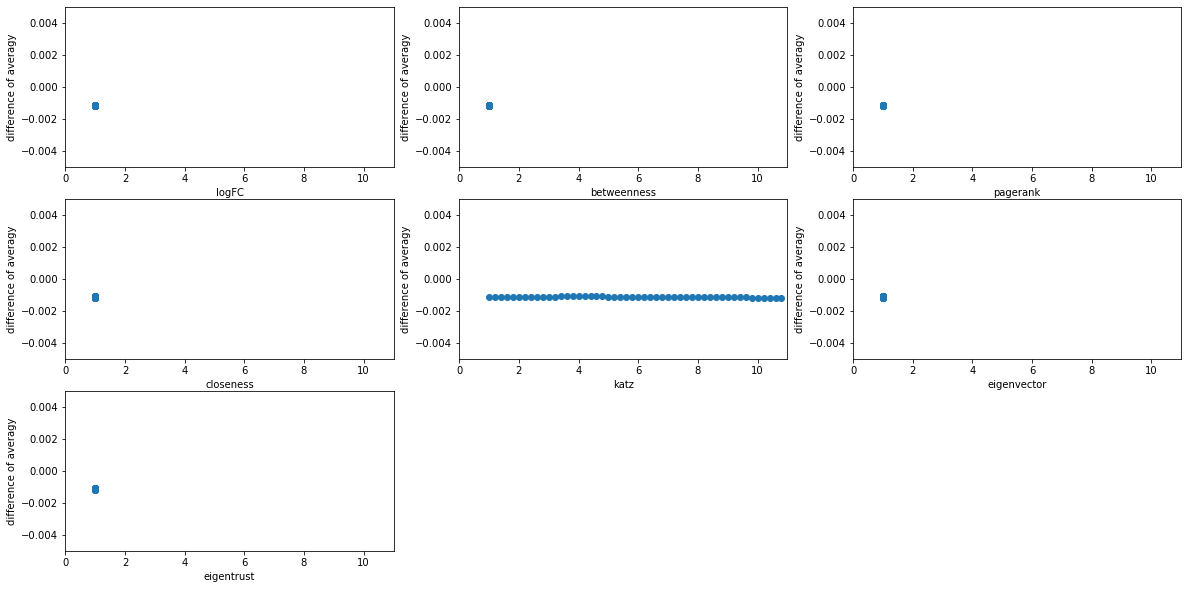

In [89]:
view_results(df_search_parameters_Fibroblasts_Induced_Neurons, '6_constant_factors_1_variable_katz', 0.005, 0.0005)

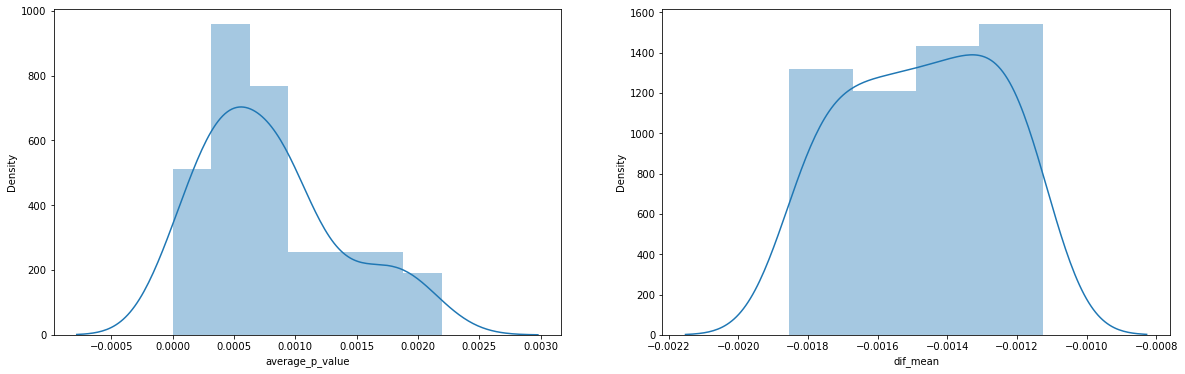

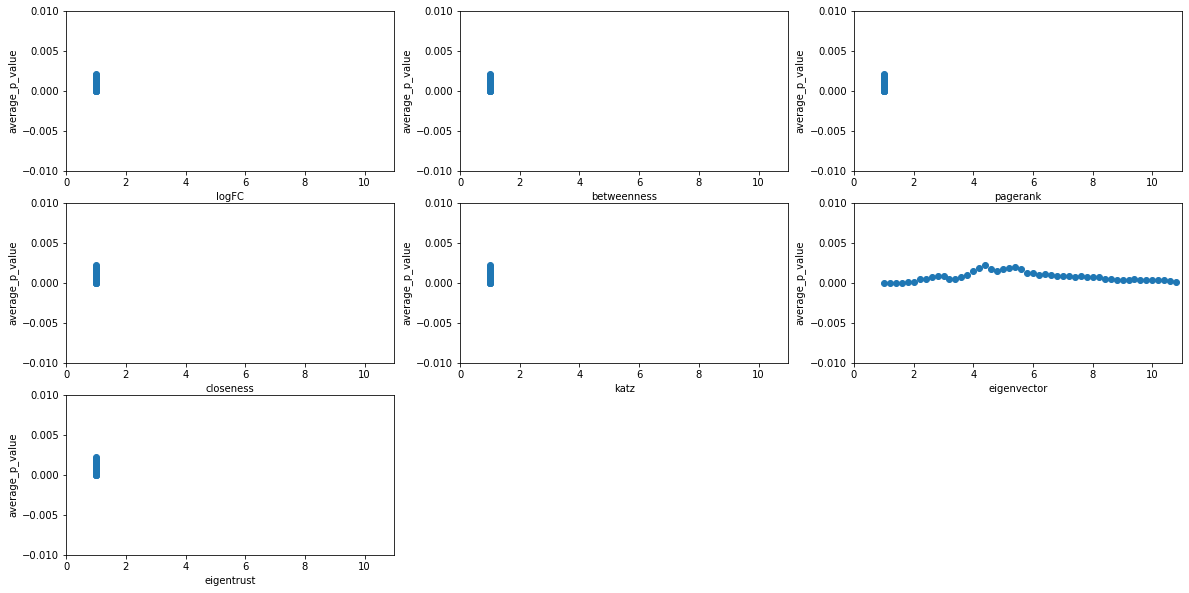

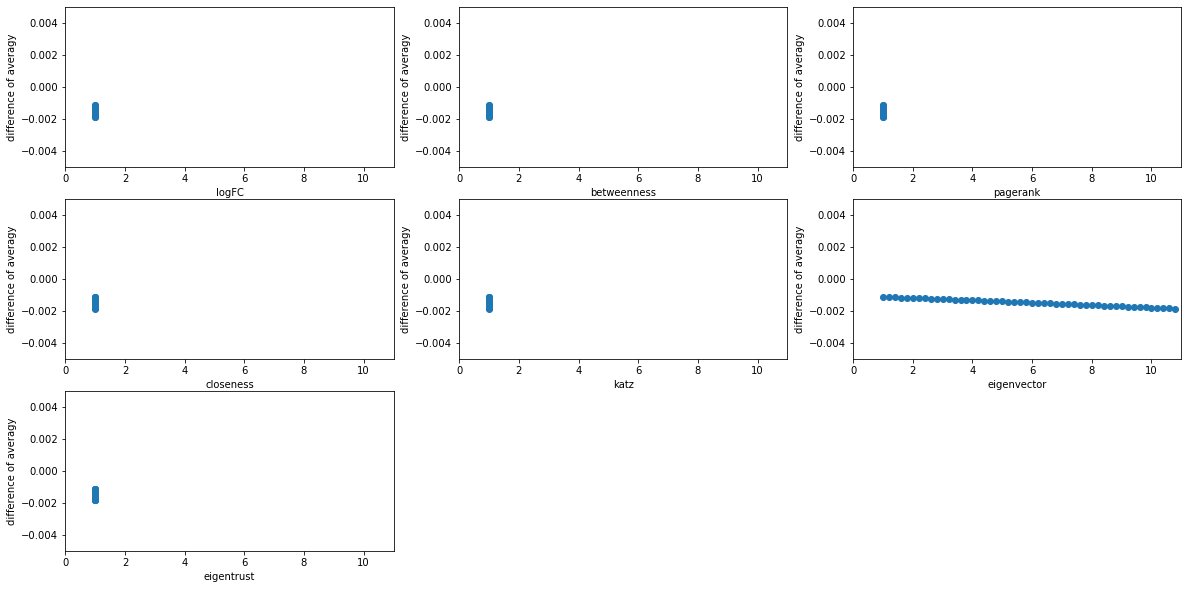

In [90]:
view_results(df_search_parameters_Fibroblasts_Induced_Neurons, '6_constant_factors_1_variable_eigenvector', 0.005, 0.01)

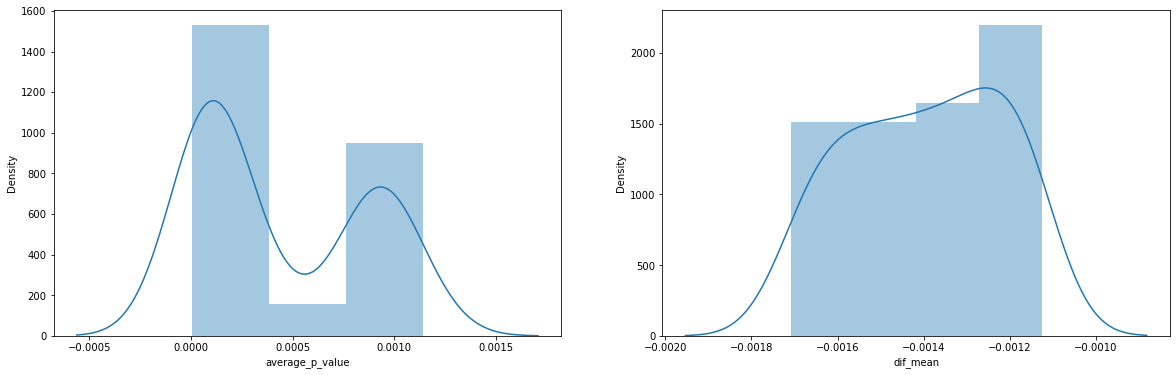

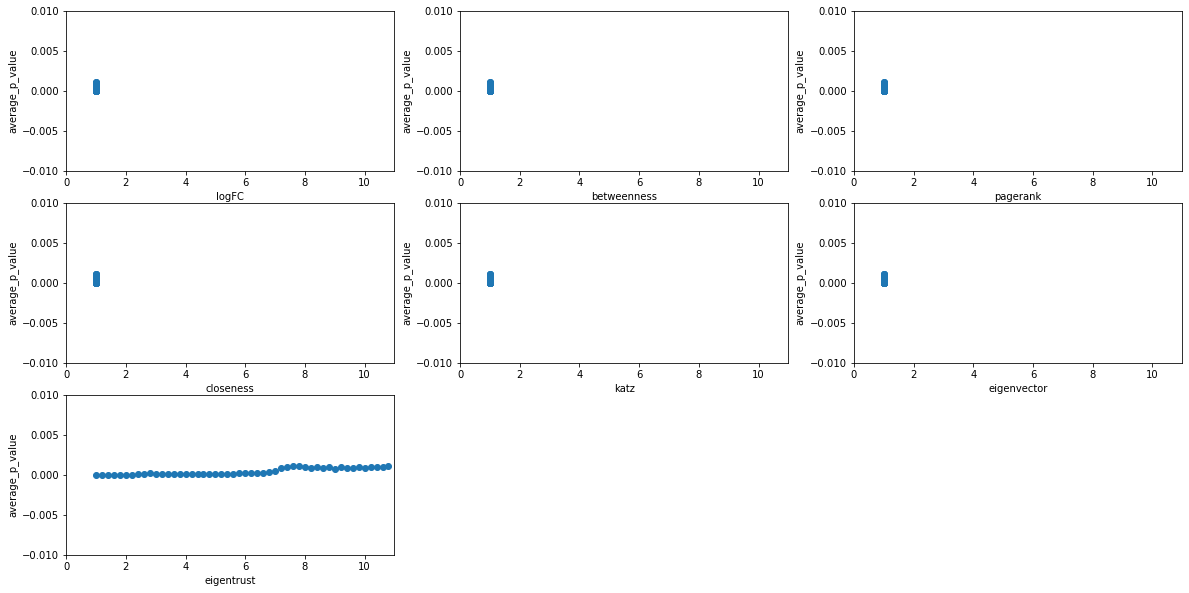

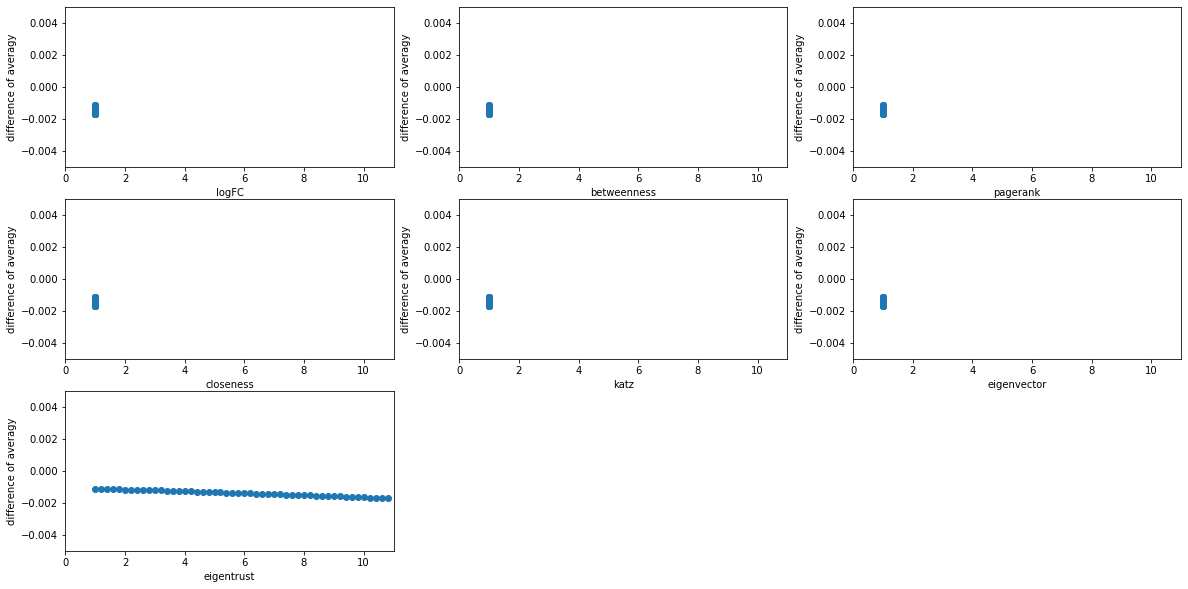

In [91]:
view_results(df_search_parameters_Fibroblasts_Induced_Neurons, '6_constant_factors_1_variable_eigentrust', 0.005, 0.01)

In [115]:
list_metric = ['logFC', 'betweenness', 'pagerank', 'closeness', 'katz', 'eigenvector', 'eigentrust']
for metric in list_metric:
    df = df_search_parameters_Fibroblasts_Induced_Neurons[df_search_parameters_Fibroblasts_Induced_Neurons['description'] == '6_constant_factors_1_variable_' + metric]
    print('при изменение метрики {}:\n минимум average_p_value {}\n максимум average_p_value {}\n минимум difference of averagу {}\n максимум difference of averagу {}\n\n'.format(metric, df['average_p_value'].min(), df['average_p_value'].max(), df['dif_mean'].min(), df['dif_mean'].max()))
    

при изменение метрики logFC:
 минимум average_p_value 2.940617599304605e-06
 максимум average_p_value 0.028262062059135062
 минимум difference of averagу -0.0020727853321478307
 максимум difference of averagу -0.0011264365087870765


при изменение метрики betweenness:
 минимум average_p_value 2.278544392014628e-09
 максимум average_p_value 3.5317492871831863e-06
 минимум difference of averagу -0.0011264365087870765
 максимум difference of averagу 6.652091624836931e-05


при изменение метрики pagerank:
 минимум average_p_value 2.940617599304605e-06
 максимум average_p_value 0.0006601975683802184
 минимум difference of averagу -0.0017263912065247355
 максимум difference of averagу -0.0011264365087870765


при изменение метрики closeness:
 минимум average_p_value 1.4621356680050296e-06
 максимум average_p_value 0.013128100120918251
 минимум difference of averagу -0.0027627160500345305
 максимум difference of averagу -0.0011264365087870765


при изменение метрики katz:
 минимум average_p_v